<h1><b> Data Science: primeiros passos

# Aula 1 - Data Science: Dados e Visualização

<h4> Carregando os dados e fazendo análises básicas

In [1]:
import pandas as pd

notas = pd.read_csv('ratings.csv')
notas.head() # mostra os 5 primeiros elementos

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [2]:
notas.shape # mostra o formato do df. Neste caso, 100.836 linhas e 4 colunas

(43084, 4)

In [3]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento'] # função do pandas que renomeia as colunas.
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [4]:
type(notas)

pandas.core.frame.DataFrame

In [5]:
# vendo todos os valores da coluna notas
notas['nota']

0        4.0
1        4.0
2        4.0
3        5.0
4        5.0
        ... 
43079    4.5
43080    3.5
43081    3.5
43082    2.5
43083    4.0
Name: nota, Length: 43084, dtype: float64

In [6]:
type(notas['nota'])

pandas.core.series.Series

In [7]:
# vendo quais os valores possíveis da coluna nota
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [8]:
# contar quantas vezes cada valor apareceu dentro da coluna nota
notas['nota'].value_counts()

4.0    11781
3.0     8533
5.0     6093
3.5     5408
4.5     4055
2.0     3085
2.5     1990
1.0     1131
1.5      535
0.5      473
Name: nota, dtype: int64

In [9]:
# checando a média de todas as notas
notas['nota'].mean()

3.5669506081143814

<h4> Visualização de dados

In [10]:
notas.nota.head() # essa sintaxe de DataFrame.coluna funciona como DataFrame['coluna']

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

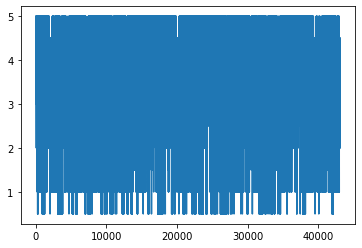

In [11]:
notas.nota.plot() # por padrão, pega o índice da série para plotar. Faz um gráfico que não serve para nada.

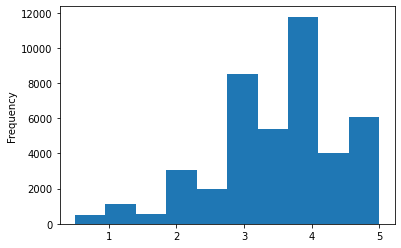

In [12]:
notas.nota.plot(kind='hist') # Com um histograma, ele plota a nota e a frequência com que cada uma aparece. Muito mais útil!

In [13]:
print("Média", notas.nota.mean()) # média
print("Mediana", notas.nota.median()) # Mostra o valor que divide a série/DF exatamente no meio (AKA mediana). 

Média 3.5669506081143814
Mediana 4.0


In [14]:
# Podemos tirar diversas medidas de uma vez só
notas.nota.describe()

count    43084.000000
mean         3.566951
std          1.022535
min          0.500000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


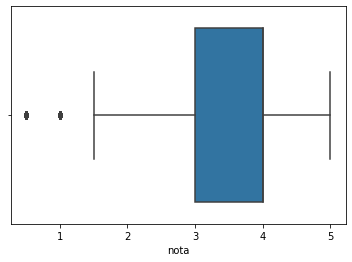

In [15]:
# Seaborn é outra biblioteca útil de visualização de dados
import seaborn as sns

sns.boxplot(notas.nota)
# linha no meio da caixa = mediana
# primeira linha da caixa (que está no valor 3) = 25%
# última linha da caixa (que está no valor 4) = 75%
# traços nas duas extremidades da caixa = os 25% restantes.

In [16]:
# Com ese boxplot, podemos entender que 50% das notas estão entre 3 e 4. Os 25% superiores estão entre 4 e 5, enquanto os 25% inferiores estão entre 1.5 e 3.

# Aula 2 - Análise Exploratória

<h4> Análise exploratória de dados e mais gráficos

In [28]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']

filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
# Quero ver as notas de Toy Story
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


Analisando algumas notas específicas por filme

In [19]:
# Faço um query 'perguntando', dentro de notas, pelas observações nas quais o filmeId é igual a 1 (o ID de Toy Story)
notas.query("filmeId == 1").nota.mean()

3.897196261682243

In [20]:
# Checando a nota de Jumanji
notas.query("filmeId == 2").nota.mean() 

3.3666666666666667

In [31]:
# Não é viável fazer isso valor por valor. Como fazemos isso no DataFrame todo? Agrupando as notas por filme e tirando a média.
# Desta forma, ele tira a média do usuarioId também, o que não quer dizer nada. Aí podemos selecionar apenas a coluna que queremos com o notas.groupby('filmeId').mean()['nota']
medias_por_filme = notas.groupby('filmeId').mean()['nota']
#medias_por_filme = notas.groupby('filmeId').nota.mean() também funciona
#ou medias_por_filme = notas.groupby('filmeId').mean().nota
medias_por_filme.head()

filmeId
1    3.897196
2    3.366667
3    3.538462
4    2.600000
5    3.480000
Name: nota, dtype: float64

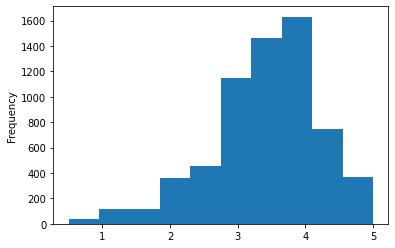

In [22]:
medias_por_filme.plot(kind='hist')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


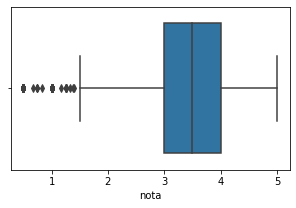

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 3))
sns.boxplot(medias_por_filme)
# sns.boxplot(y = medias_por_filme) muda a orientação do boxplot pra vertical.
# Também podemos usar o pyplot para configurar a visualização do seaborn.

In [24]:
medias_por_filme.describe()

count    6433.000000
mean        3.436251
std         0.853154
min         0.500000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


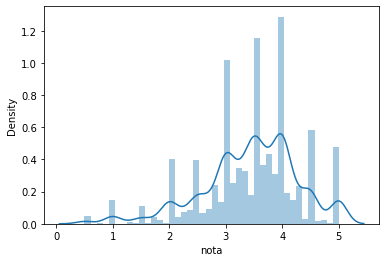

In [25]:
# pandas também faz boxplot, seaborn tb faz histogramas
sns.distplot(medias_por_filme)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


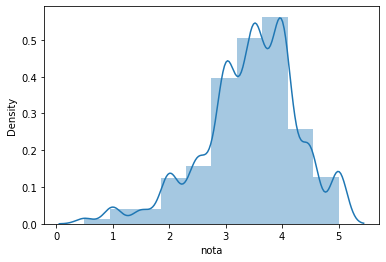

In [26]:
# podemos escolher quantas divisões (bins) o seaborn vai fazer. Por padrão, o seaborn decide a quantia que ele considera "ideal"
sns.distplot(medias_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

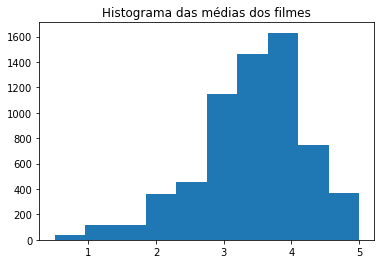

In [27]:
# Pandas e seaborn usam o pyplot como linguagem mais baixo nível
import matplotlib.pyplot as plt
 
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

# Aula 3 - Variáveis

In [37]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Variável CATEGÓRICA é aquela que não possui valor quantitativo, ao contrário, é definida por categorias.

As VARIÁVEIS CATEGÓRIAS podem ser NOMINAIS ou ORDINAIS.

NOMINAL -> Não existe uma ordem. Serve apenas para categorizar a observação (Ex: Língua do filme)

ORDINAL -> Existe uma ordem entre as categorias (Ex: escolaridade, mês de observação)


In [38]:
# Checando as línguas originais dos filmes. É uma variável CATEGÓRICA NOMINAL, pois a observação se encaixa em uma das categorias listadas abaixo.
# Esta variável não tem ordem, ou seja, uma categoria não é mais importante que a outra. Um ex. de variável categória ORDINAL seria as séries de um colégio. 
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
# budget -> orçamento -> VARIÁVEL QUANTITATIVA CONTÍNUO 
# vote count -> contagem de votos -> 1, 2, 3,4 não tem 2.5 votos por ex. Sempre mesma distância entre cada observ -> VARIÁVEL QUANTITATIVA INTERVALAR
# notas movielens -> 0.5, 1, 1.5, 2, 2.5 não tem 2.7. Mesmos intervalos entre as notas. 

# Aula 4 - Data Visualization

In [40]:
# Quantas vezes cada língua aparece
tmdb['original_language'].value_counts()

# Pode parecer um dataframe por ter uma coluna com as línguas e uma com os valores, mas na verdade é apenas uma série.

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [41]:
tmdb['original_language'].value_counts().index

# Neste caso, a primeira coluna é apenas o índice.

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object')

In [47]:
# Para criar um dataframe a partir desta série, usamos a função .to_frame

contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()

# Se quiser deixar o índice como uma coluna própria, é só usar a função .reset_index() no final 

contagem_de_lingua.columns = ['original language', 'total']
contagem_de_lingua.head()

,original language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


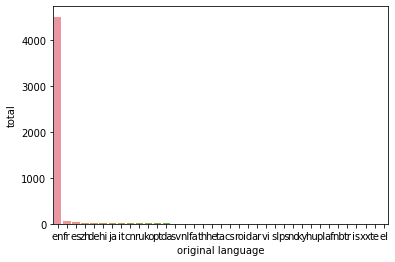

In [50]:
# Visualizando as categorias (categorical plots)
# sns.barplot(data = contagem_de_lingua) -> assim, ele plota um gráfico que não serve pra nada, precisamos específicar X e Y.
sns.barplot(x = 'original language', y = 'total', data = contagem_de_lingua)

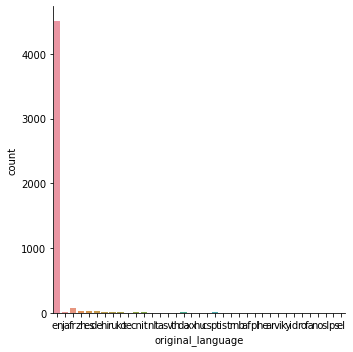

In [51]:
# Dá pra fazer visualizações mais alto nível também com o seaborn

sns.catplot(x = 'original_language', kind = 'count', data = tmdb) # vai plotar categoricamente a categoria original_languages, contando quantas vezes cada um aparece.

([<matplotlib.patches.Wedge at 0x7f853f3cf710>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

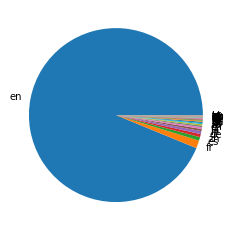

In [53]:
# Tipo de gráfico que mostra a diferença entre as categorias
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['original language'])

In [54]:
# Gráfico de pizza não é recomendado na grande maioria dos casos.

In [61]:
# Antes, estávamos penas explorando visualmente os dados. Agora, quero passar uma mensagem "comparar os filmes de lingua inglesa com todo o resto dos filmes."

total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles

print(total_de_ingles, total_do_resto)

4505 298


In [64]:
# Criando um dicionário com os dados
dados = {
    "lingua" : ['ingles', 'outros'],
    "total" : [total_de_ingles, total_do_resto]}

dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [67]:
# Criando um dataframe em cima dos dados
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


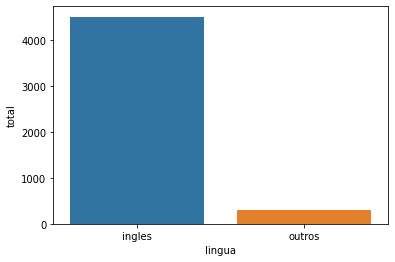

In [71]:
sns.barplot(x = 'lingua', y = 'total', data = dados)

In [75]:
# Entendendo a categoria "outros"

total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
print(total_por_lingua_de_outros_filmes)

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64


In [76]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

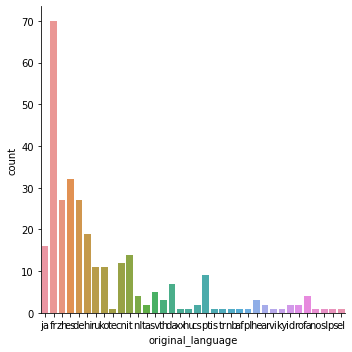

In [77]:
sns.catplot(x = 'original_language', kind = 'count', data = filmes_sem_lingua_original_em_ingles)

# Aula 5 - Continuando com Data Visualization

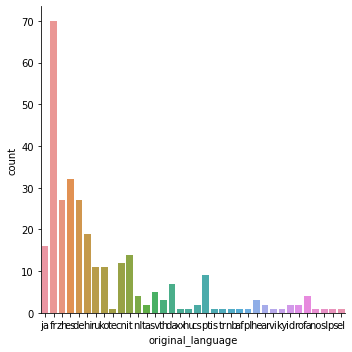

In [79]:
sns.catplot(x = 'original_language', kind = 'count', data = filmes_sem_lingua_original_em_ingles)

<Figure size 360x720 with 0 Axes>

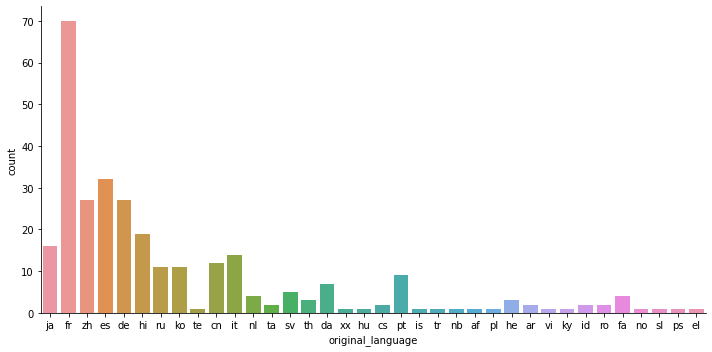

In [84]:
# Refinando o último gráfico
plt.figure(figsize = (5, 10))
# sns.catplot(x = 'original_language', kind = 'count', data = filmes_sem_lingua_original_em_ingles) -> .catplot ignora a figura do plt.figure. Precisamos usar a documentação do seaborn para alterar o formato do catplot
sns.catplot(x = 'original_language', kind = 'count', 
            data = filmes_sem_lingua_original_em_ingles,
            aspect = 2) # Aumenta o tamanho do gráfico

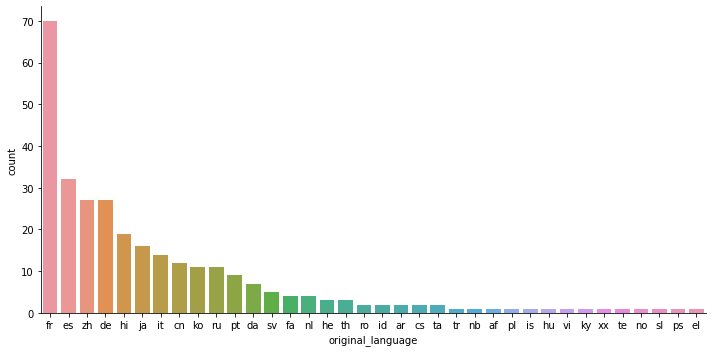

In [82]:
# Ordenando o gráfico por value count
sns.catplot(x = 'original_language', kind = 'count', 
            data = filmes_sem_lingua_original_em_ingles,
            aspect = 2,
            order = total_por_lingua_de_outros_filmes.index) # Essa variável já estava ajustada por value counts, então ordenados pelo index dela.

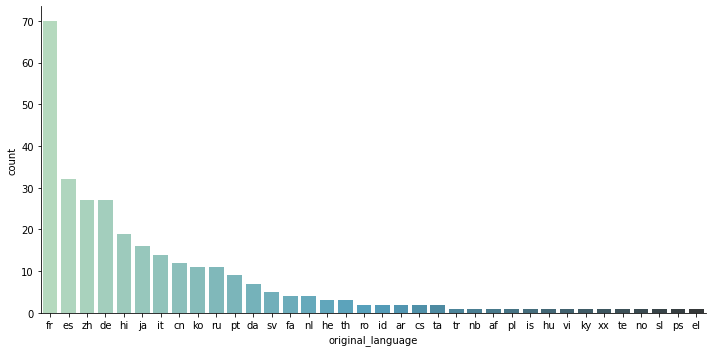

In [85]:
# Ajustando as cores
sns.catplot(x = 'original_language', kind = 'count', 
            data = filmes_sem_lingua_original_em_ingles,
            aspect = 2,
            palette = "GnBu_d",
            order = total_por_lingua_de_outros_filmes.index)

# Aula 6 - Dados e Estatística

Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, boxplot, histograma

In [87]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [91]:
notas_do_toy_story = notas.query('filmeId == 1')
notas_do_jumanji = notas.query('filmeId == 2')

print(len(notas_do_toy_story), len(notas_do_jumanji))

107 45


In [94]:
# Média dos dois filmes
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.90
Nota média do Jumanji 3.37


In [95]:
# Mediana dos filmes
print("Nota mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Nota mediana do Jumanji %.2f" % notas_do_jumanji.nota.median())

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


In [100]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [128]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2)) # Desvio padrão do filme2 é muito maior que o do filme1
print(np.median(filme1), np.median(filme2))
# Quando resumimos em um único valor, perdemos a "distribuição" das notas. No Filme 2, temos um caso em que as pessoas ou AMAM ou ODEIAM o filme. Já o Filme 1 é considerado mediano.

3.0 3.0
0.5 2.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

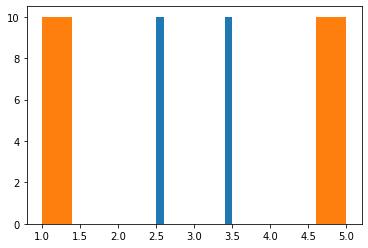

In [110]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f853e311850>,
 'caps': [<matplotlib.lines.Line2D at 0x7f853e2758d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f853e27c910>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f853e27c3d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f853e271e10>,
  <matplotlib.lines.Line2D at 0x7f853e2858d0>]}

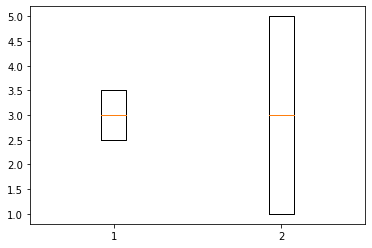

In [114]:
plt.boxplot([filme1, filme2])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7f853e147b90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f853e15ad50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f853e133290>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f853e15a450>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f853e151110>,
  <matplotlib.lines.Line2D at 0x7f853e154790>]}

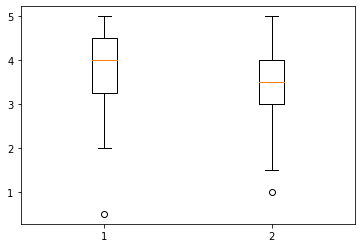

In [117]:
# Vendo a distribuição das notas de cada filme
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])
# sns.boxplot(notas_do_toy_story.nota)
# sns.boxplot(notas_do_jumanji.nota)

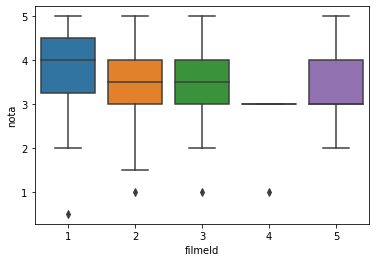

In [120]:
sns.boxplot(x = 'filmeId', y = 'nota', data = notas.query("filmeId in [1, 2, 3, 4, 5]"))

In [126]:
# Medindo quão distantes estão os pontos da mediana (desvio padrão)
print(notas_do_toy_story.nota.std())
print(notas_do_jumanji.nota.std())

0.8815143428156269
0.9132857762447135
